In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from spectral import *
import numpy as np
import scipy.spatial.distance as distance
import pylab
import spectral.io.envi as envi
import random
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from timeit import default_timer as timer

In [4]:
from autoclustering import find_maxdist_clusters
from hiersubclustering import subdivide_by_modules
from visual_utils import show_classes, show_histogram, show_centers
from math_utils import cluster_histogram, normalized

Читаем изображение.

In [5]:
#img = open_image('92AV3C.lan')
# gt = open_image('92AV3GT.GIS').read_band(0)
img = envi.open('f080611t01p00r07rdn_c_sc01_ort_img.hdr')

In [6]:
print(img)

	Data Source:   '/home/marko/HSI/f080611t01p00r07rdn_c/f080611t01p00r07rdn_c_sc01_ort_img'
	# Rows:           1924
	# Samples:         753
	# Bands:           224
	Interleave:        BIP
	Quantization:  16 bits
	Data format:     int16


In [7]:
#data = img[:,:,:]
data = img[400:1000, 200:, :]
#data = img[400:700, 200:400, :]

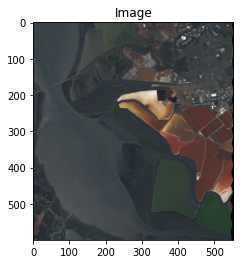

In [8]:
view = imshow(data, (29, 20, 12), title="Image")

In [9]:
data[data <= 0] = 1
print(data.dtype)

>i2


In [10]:
from autoclustering import *
from class_cluster_compress import *
from kmeans import *
from visual_utils import *

In [11]:
(class_map, centers) = find_related_clusters2(data, 0.99)
# (class_map, centers) = find_maxdist_clusters(data, 0.99)
#(class_map, centers) = find_ppi_clusters(data)
(class_map, centers) = kmeans_cosine(data, nclusters=centers.shape[0], max_iterations=10, start_clusters=centers)
print('Centers\' shape: ', centers.shape)

99% completed
Iteration 10 (13182 pixels reassinged previously)...13930 pixels reassigned in last iteration.
kmeans terminated with 115 clusters after 10 iterations.
Centers' shape:  (115, 224)


In [12]:
scale_map = compute_scale_map(data, class_map, centers)
reconstruction = reconstruct_image(scale_map, class_map, centers)
print_diff_stats(data, reconstruction)

Norm:  500715.44117516826
Max:  1927.8163866407515
Min:  3.3306690738754696e-16
Avg:  31.500648081112338


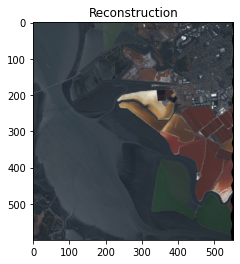

In [13]:
view = imshow(reconstruction, (29, 20, 12), title="Reconstruction")

ImageView object:
  Interpolation       :  <default>

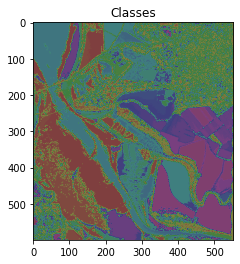

In [14]:
show_classes(class_map)

In [15]:
it_counts = [0, 1, 2, 7, 23, 37, 63]
class_map_mod = None

In [16]:
(class_map_1, centers_1) = find_related_clusters2(data, 0.99)
simple_related_error_burndown = []

centers_mod = centers_1
for it_count in it_counts:
    print('Running for it_count {}'.format(it_count))
    (class_map_mod, centers_mod) = kmeans_cosine(data, nclusters=centers_mod.shape[0], max_iterations=it_count, start_clusters=centers_mod)
    scale_map = compute_scale_map(data, class_map_mod, centers_mod)
    reconstruction = reconstruct_image(scale_map, class_map_mod, centers_mod)
    avg_diff = get_avg_diff(data, reconstruction)
    print('Avg diff: ', avg_diff)
    simple_related_error_burndown.append(avg_diff)

class_map_mod_1 = class_map_mod.copy()

99% completed
Running for it_count 0
0 pixels reassigned in last iteration.
kmeans terminated with 1 clusters after 0 iterations.
Avg diff:  213.6262891891601
Running for it_count 1
Iteration 1 (0 pixels reassinged previously)...226522 pixels reassigned in last iteration.
kmeans terminated with 115 clusters after 1 iterations.
Avg diff:  43.298752776860844
Running for it_count 2
Iteration 2 (234811 pixels reassinged previously)...50329 pixels reassigned in last iteration.
kmeans terminated with 115 clusters after 2 iterations.
Avg diff:  35.05471563664831
Running for it_count 7
Iteration 7 (13182 pixels reassinged previously)....13930 pixels reassigned in last iteration.
kmeans terminated with 115 clusters after 7 iterations.
Avg diff:  31.500648081112338
Running for it_count 23
Iteration 23 (2891 pixels reassinged previously)....2970 pixels reassigned in last iteration.
kmeans terminated with 115 clusters after 23 iterations.
Avg diff:  30.157888590075505
Running for it_count 37
Itera

In [17]:
(class_map_2, centers_2) = find_maxdist_clusters(data, 0.99)
simple_maxdist_error_burndown = []
centers_mod = centers_2

for it_count in it_counts:
    print('Running for it_count {}'.format(it_count))
    centers_mod = centers_1
    (class_map_mod, centers_mod) = kmeans_cosine(data, nclusters=centers_mod.shape[0], max_iterations=it_count, start_clusters=centers_mod)
    scale_map = compute_scale_map(data, class_map_mod, centers_mod)
    reconstruction = reconstruct_image(scale_map, class_map_mod, centers_mod)
    avg_diff = get_avg_diff(data, reconstruction)
    print('Avg diff: ', avg_diff)
    simple_maxdist_error_burndown.append(avg_diff)

class_map_mod_2 = class_map_mod.copy()

assigning values...left 0             
done
Running for it_count 0
0 pixels reassigned in last iteration.
kmeans terminated with 1 clusters after 0 iterations.
Avg diff:  213.6262891891601
Running for it_count 1
Iteration 1 (0 pixels reassinged previously)...226522 pixels reassigned in last iteration.
kmeans terminated with 115 clusters after 1 iterations.
Avg diff:  43.298752776860844
Running for it_count 2
Iteration 2 (226522 pixels reassinged previously)...70078 pixels reassigned in last iteration.
kmeans terminated with 115 clusters after 2 iterations.
Avg diff:  37.6680880420203
Running for it_count 7
Iteration 7 (19127 pixels reassinged previously)....15027 pixels reassigned in last iteration.
kmeans terminated with 115 clusters after 7 iterations.
Avg diff:  32.30617185298796
Running for it_count 23
Iteration 23 (3122 pixels reassinged previously)....3206 pixels reassigned in last iteration.
kmeans terminated with 115 clusters after 23 iterations.
Avg diff:  30.439238826824877
R

In [18]:
(class_map_3, centers_3) = find_ppi_clusters(data)
ppi_error_burndown = []
centers_mod = centers_3

for it_count in it_counts:
    print('Running for it_count {}'.format(it_count))
    (class_map_mod, centers_mod) = kmeans_cosine(data, nclusters=centers_mod.shape[0], max_iterations=it_count, start_clusters=centers_mod)
    scale_map = compute_scale_map(data, class_map_mod, centers_mod)
    reconstruction = reconstruct_image(scale_map, class_map_mod, centers_mod)
    avg_diff = get_avg_diff(data, reconstruction)
    print('Avg diff: ', avg_diff)
    ppi_error_burndown.append(avg_diff)

class_map_mod_3 = class_map_mod.copy()

Running 3000 pixel purity iterations... 98.3Running 3000 pixel purity iterations... 98.7Running 3000 pixel purity iterations... 99.0Running 3000 pixel purity iterations... 99.3Running 3000 pixel purity iterations... 99.7Running 3000 pixel purity iterations... 100.Running 3000 pixel purity iterations...done   
(113, 224)
Running for it_count 0
0 pixels reassigned in last iteration.
kmeans terminated with 1 clusters after 0 iterations.
Avg diff:  882.9867145043002
Running for it_count 1
Iteration 1 (0 pixels reassinged previously)...329162 pixels reassigned in last iteration.
kmeans terminated with 111 clusters after 1 iterations.
Avg diff:  52.586802190115655
Running for it_count 2
Iteration 2 (329162 pixels reassinged previously)...53520 pixels reassigned in last iteration.
kmeans terminated with 111 clusters after 2 iterations.
Avg diff:  39.61737978217412
Running for it_count 7
Iteration 7 (16790 pixels reassinged previously)....16325 pixels reassigned in last iteration.
kmeans term

In [19]:
(class_map_4, centers_4) = find_smacc_clusters(data)
smacc_error_burndown = []
centers_mod = centers_4

for it_count in it_counts:
    print('Running for it_count {}'.format(it_count))
    (class_map_mod, centers_mod) = kmeans_cosine(data, nclusters=centers_mod.shape[0], max_iterations=it_count, start_clusters=centers_mod)
    scale_map = compute_scale_map(data, class_map_mod, centers_mod)
    reconstruction = reconstruct_image(scale_map, class_map_mod, centers_mod)
    avg_diff = get_avg_diff(data, reconstruction)
    print('Avg diff: ', avg_diff)
    smacc_error_burndown.append(avg_diff)

class_map_mod_4 = class_map_mod.copy()

Running for it_count 0current max residual norm is 32742.0000
0 pixels reassigned in last iteration.
kmeans terminated with 1 clusters after 0 iterations.
Avg diff:  211.01276838532786
Running for it_count 1
Iteration 1 (0 pixels reassinged previously)...331134 pixels reassigned in last iteration.
kmeans terminated with 110 clusters after 1 iterations.
Avg diff:  37.14073600564267
Running for it_count 2
Iteration 2 (330848 pixels reassinged previously)...44141 pixels reassigned in last iteration.
kmeans terminated with 120 clusters after 2 iterations.
Avg diff:  31.066735504977697
Running for it_count 7
Iteration 7 (9877 pixels reassinged previously).....9266 pixels reassigned in last iteration.
kmeans terminated with 120 clusters after 7 iterations.
Avg diff:  29.408569829989407
Running for it_count 23
Iteration 23 (1801 pixels reassinged previously)....1615 pixels reassigned in last iteration.
kmeans terminated with 120 clusters after 23 iterations.
Avg diff:  28.863493079371914
Runn

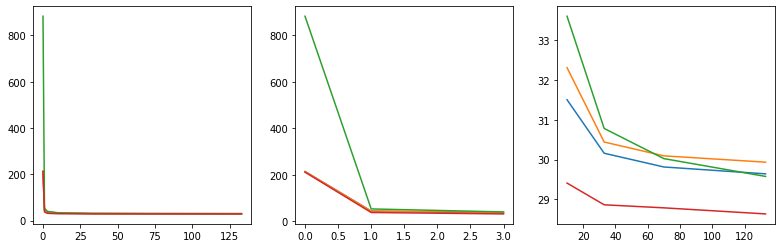

In [20]:
counts_cumsum = np.cumsum(it_counts)

fig = pylab.figure()
fig.set_size_inches(18, 4)
pylab.subplot(1, 4, 1)
pylab.plot(counts_cumsum, simple_related_error_burndown)
pylab.plot(counts_cumsum, simple_maxdist_error_burndown)
pylab.plot(counts_cumsum, ppi_error_burndown)
pylab.plot(counts_cumsum, smacc_error_burndown)

pylab.subplot(1, 4, 2)
pylab.plot(counts_cumsum[:3], simple_related_error_burndown[:3])
pylab.plot(counts_cumsum[:3], simple_maxdist_error_burndown[:3])
pylab.plot(counts_cumsum[:3], ppi_error_burndown[:3])
pylab.plot(counts_cumsum[:3], smacc_error_burndown[:3])

pylab.subplot(1, 4, 3)
pylab.plot(counts_cumsum[3:], simple_related_error_burndown[3:])
pylab.plot(counts_cumsum[3:], simple_maxdist_error_burndown[3:])
pylab.plot(counts_cumsum[3:], ppi_error_burndown[3:])
pylab.plot(counts_cumsum[3:], smacc_error_burndown[3:])

ImageView object:
  Interpolation       :  <default>

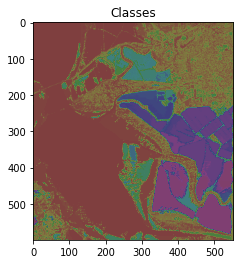

In [21]:
show_classes(class_map_1)

ImageView object:
  Interpolation       :  <default>

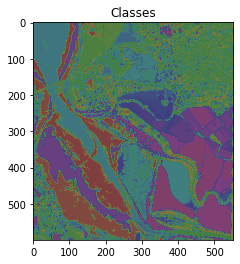

In [22]:
show_classes(class_map_mod_1)

ImageView object:
  Interpolation       :  <default>

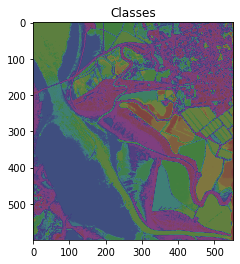

In [23]:
show_classes(class_map_2)

ImageView object:
  Interpolation       :  <default>

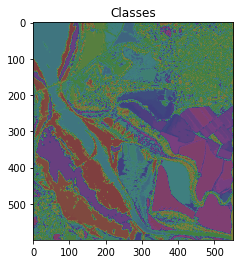

In [24]:
show_classes(class_map_mod_2)

ImageView object:
  Interpolation       :  <default>

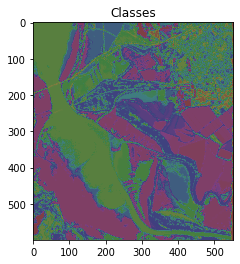

In [25]:
show_classes(class_map_3)

ImageView object:
  Interpolation       :  <default>

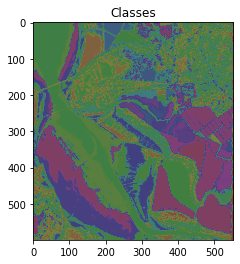

In [26]:
show_classes(class_map_mod_3)

ImageView object:
  Interpolation       :  <default>

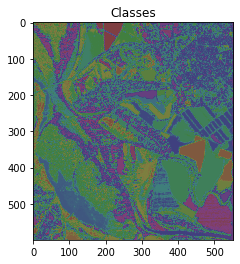

In [37]:
show_classes(class_map_mod_4)

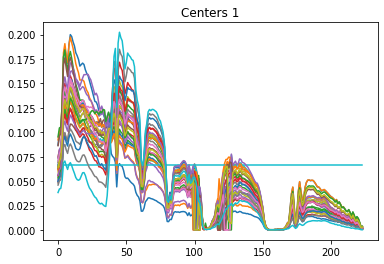

In [27]:
show_centers(centers_1, 'Centers 1')

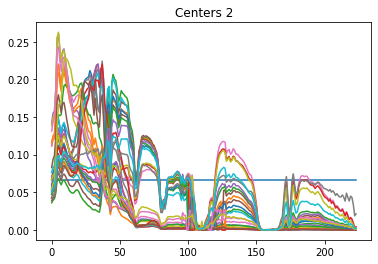

In [28]:
show_centers(centers_2, 'Centers 2')

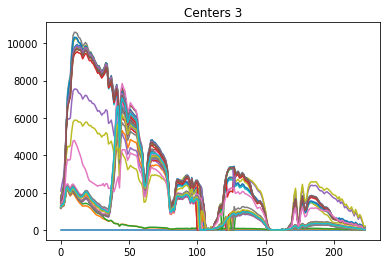

In [29]:
show_centers(centers_3, 'Centers 3')

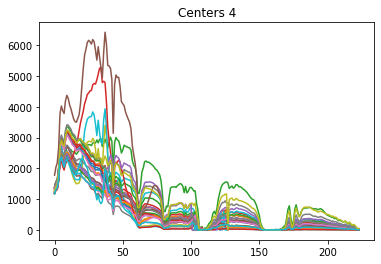

In [30]:
show_centers(centers_4, 'Centers 4')

In [ ]:
angles = spectral_angles(data, centers_3)
a_c_m = np.argmin(angles, axis=2)
show_classes(a_c_m)

ImageView object:
  Interpolation       :  <default>

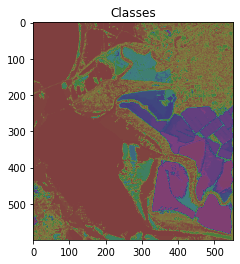

In [39]:
angles = spectral_angles(data / 10000, centers_1 / 10000)
a_c_m = np.argmin(angles, axis=2)
show_classes(a_c_m)

ImageView object:
  Interpolation       :  <default>

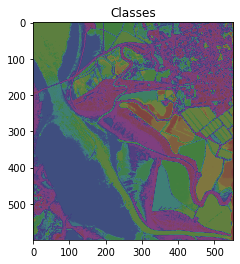

In [40]:
angles = spectral_angles(data / 10000, centers_2 / 10000)
a_c_m = np.argmin(angles, axis=2)
show_classes(a_c_m)

ImageView object:
  Interpolation       :  <default>

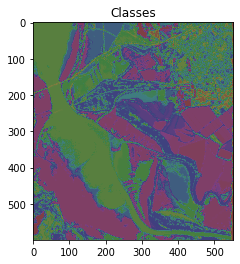

In [41]:
angles = spectral_angles(data / 10000, centers_3 / 10000)
a_c_m = np.argmin(angles, axis=2)
show_classes(a_c_m)

ImageView object:
  Interpolation       :  <default>

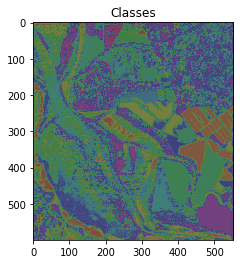

In [42]:
angles = spectral_angles(data / 10000, centers_4 / 10000)
a_c_m = np.argmin(angles, axis=2)
show_classes(a_c_m)

In [31]:
ssdata = data[200:250, 100:150, :] / 10000
ssdata[ssdata == 0.0] = 1e-10
# ssdata = np.array([
#     [ [1, 8, 7], [8, 2, 4] ],
#     [ [2, 4, 3], [7, 5, 3] ],
#     [ [1, 2, 1], [9, 4, 6] ]
# ], dtype=np.float64)

In [32]:
ssdata_rows = ssdata.reshape(ssdata.shape[0] * ssdata.shape[1], ssdata.shape[2])

ImageView object:
  Display bands       :  [0, 112.0, 223]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.1173, 0.1512]
    G: [0.0014, 0.0088]
    B: [0.0002, 0.0057]

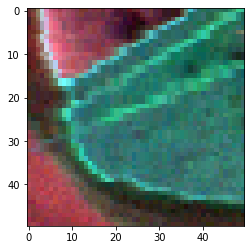

In [33]:
imshow(ssdata)

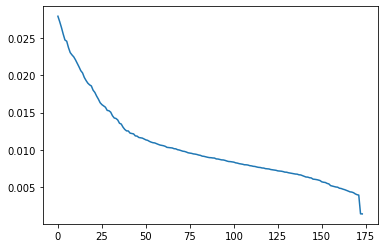

In [34]:
svals = np.linalg.svd(ssdata_rows, compute_uv=False)
pylab.plot(svals[50:])

In [35]:
from spectral.algorithms import ppi, smacc

In [36]:
from spectral.algorithms import smacc
from numpy.testing import assert_allclose
S, F, R = smacc(ssdata)
recon = np.matmul(F, S) + R
recon_im = recon.reshape(ssdata.shape)
assert_allclose(ssdata, recon_im)
assert(np.min(F) == 0.0)